In [30]:
import pandas as pd
import re

In [3]:
# reading in the data to start with
data_pt_1 = pd.read_csv("editors1_ror_and_countries.csv", encoding="utf-8")
data_pt_2 = pd.read_csv("editors2_ror_and_countries.csv", encoding ="utf-8")

C:\Users\ashbu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# combining the two datasets
data_combined = pd.concat([data_pt_1, data_pt_2], axis= 0).reset_index(drop=True)

#### Preliminary Exploration

In [5]:
# looking at the descriptions for each of the columns
data_combined.describe()

,publisher,issn,journal,role,editor,affiliation,country,continent,ror,url,date
count,478512,347315,478506,478484,478512,470134,445960,440578,394107,476721,478512
unique,17,3161,6056,5291,388687,141914,1059,5,16670,6024,13
top,Frontiers Media,1664-1078,Frontiers in in Psychology,Review Editor,"Dorgham, M.A.",Emerald Publishing,United States,Europe,https://ror.org/02jx3x895,https://www.frontiersin.org/journals/psycholog...,2020-12-15
freq,174294,9961,9961,109246,79,679,74997,180795,1698,9961,122122


tweet about the top editor: https://twitter.com/familyunequal/status/1389668990243557384?lang=en

It's pretty clear that there's only 17 publishers in the dataset and there are only ~6000 journals to worry about. However, there are ~3.8k editors appearing in the dataset affiliated with 1.5k institutions. Unsurprisingly, the top country appearing in the data is the United States and the top continent is Europe. 

Looking at the columns we don't *really* need to worry too much about, I'd say we can ignore ISSN (b/c it's not really relevant and has too many null vals), ROR (research organization identifer (b/c it's got too many null vals), URL (b/c it's not relevant). However, I think we should keep the rest including the date of scraping column b/c we may be able to use that as an additional angle for analysis. I hesitated over role, but decided that for now, it might be interesting to keep it (we can always toss it later).

In [6]:
%%time
# dropping the columns I don't care about (in place b/c I know what I'm doing)
data_combined.drop(["issn","ror","url"], axis=1, inplace=True)

Wall time: 121 ms


In [7]:
# looking at the values for the publishers -> can easily do b/c there's only 17
data_combined["publisher"].value_counts()

Frontiers Media                        174294
Elsevier                               108961
SAGE                                    56136
MDPI                                    35063
Emerald                                 18485
Inderscience                            16961
Hindawi                                 13424
Cambridge University Press              12105
PLOS                                    10643
IGI Global                               9921
Brill                                    5956
American Psychological Association       3740
Karger                                   3419
Pleiades                                 3142
Royal Society of Chemistry               2721
John Benjamins                           2522
American Society of Civil Engineers      1019
Name: publisher, dtype: int64

Looking at these, it's not too surprising, I do think b/c it's such a small number of publishers, we should be able to find headquarters information and figure out where most of the editors of journals they control are from (could be an interesting angle for our visualization.

In [8]:
# looking at the top 20 values for the journal -> b/c there's too many to go deeper
# I think it'd be interesting to look at the distribution of these -> I suspect it'll follow a power-law distribution
data_combined["journal"].value_counts().head(20)

Frontiers in in Psychology                         9961
PLOS ONE                                           9219
Frontiers in in Physiology                         8218
Frontiers in in Neuroscience                       7895
Frontiers in in Genetics                           7698
Frontiers in in Microbiology                       6990
Frontiers in in Oncology                           6676
Frontiers in in Immunology                         6509
Frontiers in in Plant Science                      6154
Frontiers in in Pharmacology                       5818
Frontiers in in Neurology                          4789
Frontiers in in Celland Developmental Biology      4687
Frontiers in in Marine Science                     3980
Frontiers in in Psychiatry                         3950
Frontiers in in Pediatrics                         3802
Frontiers in in Endocrinology                      3718
Frontiers in in Physics                            3645
Frontiers in in Chemistry                       

It's immediately clear that Frontiers seems to dominate in the publishing game (at least our data). 

<AxesSubplot:>

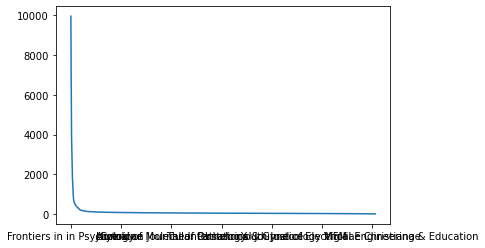

In [9]:
# visualizing the distribution of the journals
data_combined["journal"].value_counts().plot()

As I suspected, even though the x-axis is messy, we can still see there's a power law distribution.

In [10]:
# looking at role -> top 20 b/c too many to count otherwise
data_combined["role"].value_counts().head(20)

Review Editor                    109246
Editorial Board                   84007
Editorial Board Members           58521
Guest Associate Editor            41688
Associate Editors                 25944
Associate Editor                  25149
Editorial Advisory Board          18369
Academic Editors                  12161
Editorial Review Board            11286
Advisory Board                     7485
Editors                            5743
Consulting Editors                 4843
International Advisory Board       3448
International Editorial Board      3328
EDITORIAL BOARD                    2372
Editor-in-Chief                    1944
Advisory Editorial Board           1666
Editor                             1432
Section Editors                    1336
Editorial Board Member             1316
Name: role, dtype: int64

My immediate takeaway from this is there are so many different titles. Which makes me question is we *really* care about the titles as much as their mere affiliation with a publisher? Of course, that represents a caveat we'd have to include in our visualization, but I suspect that's not neccesarily a negative.

<AxesSubplot:>

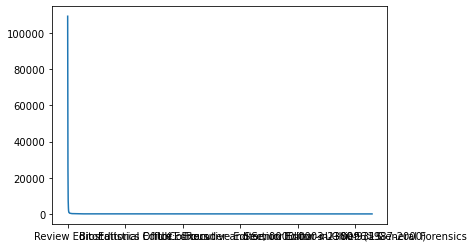

In [11]:
# checking the distribution for funsies
data_combined["role"].value_counts().plot()

Another power law distribution (unsurprising really).

In [12]:
# looking at affiliation
data_combined["affiliation"].value_counts().head(20)

Emerald Publishing                                                                   679
University of São Paulo; São Paulo, Brazil                                           642
Centre National de la Recherche Scientifique (CNRS); Paris, France                   642
Sapienza University of Rome; Rome, Italy                                             642
University College London; London, United Kingdom                                    626
Institut National de la Santé et de la Recherche Médicale (INSERM); Paris, France    557
National University of Singapore, Singapore                                          545
University of Padua; Padua, Italy                                                    508
University of Florida; Gainesville, United States                                    496
University of Milan; Milan, Italy                                                    495
Stanford University; Stanford, United States                                         491
University of Naples 

Looking at affiliation is an interesting angle. WE can see some institutions dominating within this dataset but we can also see that some of them aren't too surprising (Oxford) but others are more surprising (Padua for instance).

In [13]:
# looking at country
data_combined["country"].value_counts().head(20)

United States     74997
USA               47081
Italy             30672
China             22746
United Kingdom    21414
Germany           19230
UK                16730
Australia         16080
Spain             15683
France            15639
Canada            14705
Japan             11227
India              8924
Netherlands        7684
Brazil             7339
Switzerland        5903
Sweden             4704
Korea              4462
Portugal           4445
Greece             4102
Name: country, dtype: int64

I looked a little deeper at this columns and it's a bit messy (some of the countries are actually lists). This messyness continues with the top 20 as we have some double counting going on (United Kingdom & UK, United States & USA). We'll have to do some work on this column I'd say to correct these mappings. We *may* also want to think about how to address the lists (though I suspect they represent only a small part of the data).

In [14]:
# looking at continent
data_combined["continent"].value_counts()

Europe      180795
Americas    153825
Asia         79806
Oceania      20599
Africa        5553
Name: continent, dtype: int64

<AxesSubplot:ylabel='continent'>

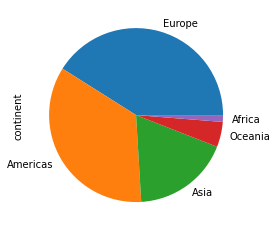

In [15]:
data_combined["continent"].value_counts().plot(kind="pie")

It's pretty clearly concentrated among Europe and America in terms of continent.

In [16]:
data_combined["date"].value_counts()

2020-12-15    122122
2020-12-14     73556
2020-12-23     51158
2020-12-22     47342
2020-12-28     42139
2020-12-16     36350
2020-12-21     33655
2020-12-18     24470
2021-01-18     20344
2020-12-17     13314
2020-12-19      9219
2021-01-28      3419
2020-12-25      1424
Name: date, dtype: int64

Looking at the actual values for dates, I'm not sold on the utility of the column so I'm inclined to drop it.

##### Final Cleaning

In [17]:
# dropping the two columns I realized didn't provide any utility 
data_combined.drop(["role","date"], axis=1, inplace=True)

In [18]:
# checking what nans we've retained here
data_combined.isna().sum()

publisher          0
journal            6
editor             0
affiliation     8378
country        32552
continent      37934
dtype: int64

We'll have to make a decision about whether we want to drop these NAs and whether these are important enough but for now, I'm going to go ahead and drop them just to be doing what I normally would.

In [19]:
# dropping nans like I normally would
data_combined.dropna(inplace=True)

In [20]:
# remapping the country names I know are messed up -> would have preferred if they had used country codes though
data_combined.loc[data_combined["country"] == "USA", "country"] = "United States"
data_combined.loc[data_combined["country"] == "UK", "country"] = "United Kingdom"

In [21]:
data_combined["country"].value_counts().head(50)

United States                   122078
United Kingdom                   38144
Italy                            30672
China                            22746
Germany                          19230
Australia                        16080
Spain                            15683
France                           15639
Canada                           14705
Japan                            11227
India                             8924
Netherlands                       7684
Brazil                            7339
Switzerland                       5903
Sweden                            4704
Korea                             4462
Portugal                          4445
Greece                            4102
Belgium                           4034
Russia                            3299
Austria                           3226
Taiwan                            2977
Israel                            2892
New Zealand                       2886
Poland                            2849
Turkey                   

Unfortunately, I still need to do some more cleaning on the countries here. Like a lot more cleaning to fix it. I should make a function which splits on the vals on commas and if they are the same, reassigns the whole to that value. Because that seems to be repeating that much.

#### Further Cleaning

In [22]:
# function to apply to the series values
# takes in a list -> returns either a single value or a list
def dup_fix(x):
        
    # removing the white space 
    x = [i.strip() for i in x]
    
    # checking if the 0th element is the entirety of the list
    # returning 0th element if all the elements are the same
    if x.count(x[0]) == len(x):
        return(x[0])
    
    # else all the elements are the same 
    else:
        return(x)

In [23]:
# pulls only those rows where the country has a list (contains a comma) and splits those into a list
# those represent ~27k rows...
# splitting on a double comma because that's the format we're dealing with here for some reason...
data_combined[data_combined["country"].str.contains(",") == True]["country"].str.split(",,")

# fixing those countries where they are a single country represented as a list
data_combined.loc[data_combined["country"].str.contains(",") == True, "country"] = (
    data_combined[data_combined["country"].str.contains(",") == True]["country"].str.split(",").apply(dup_fix))

In [45]:
# function to clean up the editor column
# function takes in the editor and removes white space
def editor_cleaner(x):
    
    # removing the carriage returns and the new lines
    x = x.strip()

    # checking for the pattern of years in parens
    # using a regex to search for (YYYY-YYYY)
    search = re.search('(.*)(\(\d\d\d\d-\d\d\d\d\))', x)
    
    # checking if there is a match
    if search:
        # if there's a match, pulling group 1
        # stripping trailing and leading whitespace -> just in case
        x = search.group(1)
        x = x.strip()
        
    return x

In [47]:
# fixing the editor names where they are super messy
data_combined["editor"] = data_combined["editor"].apply(editor_cleaner)

In [51]:
data_combined["affiliation"].head()

0     Children<U+0092>s Health, Dallas, United States
1    University of Nebraska at Lincoln, United States
2                    Temple University, United States
3                         VA San Diego, United States
4                   Clemson University, United States
Name: affiliation, dtype: object

In [57]:
data_combined[data_combined["affiliation"].str.find("<U+0092>") >= 0]

,publisher,journal,editor,affiliation,country,continent
0,American Psychological Association,American Journal of Orthopsychiatry,"Jill D. McLeigh, PhD","Children<U+0092>s Health, Dallas, United States",United States,Americas
2268,American Psychological Association,Neuropsychology<U+00AE>,"Stephen J. C. Hearps, MBiostat<em>",<br>\r\r\r\nMurdoch Children<U+0092>s Research...,Australia,Oceania
3304,American Psychological Association,"Psychology, Public Policy, and Law<U+00AE>","Christopher E. Kelly, PhD","Saint Joseph<U+0092>s University, United States",United States,Americas
3645,American Psychological Association,Stigma and Health,"Claire Henderson, PhD","King<U+0092>s College London, United Kingdom",United Kingdom,Europe
3903,American Society of Civil Engineers,Journal of Composites for Construction,Joshua Woods,"Queen<U+0092>s University, Canada",Canada,Americas
...,...,...,...,...,...,...
476195,SAGE,Multiple Sclerosis Journal <U+0096> Experiment...,Michael Hutchinson,"St. Vincent<U+0092>s University Hospital, Ireland",Ireland,Europe
476207,SAGE,Multiple Sclerosis Journal <U+0096> Experiment...,Anne-Louise Ponsonby,"Murdoch Children<U+0092>s Research Institute, ...",Australia,Oceania
476649,SAGE,The Neurohospitalist,"Christopher Doughty, MD",Brigham and Women<U+0092>s Hospital and Harvar...,United States,Americas
477567,SAGE,Nursing Science Quarterly,"Karen Carroll, RN, PhD",Ann & Robert H. Lurie Children<U+0092>s Hospit...,United States,Americas


Still need to fix the character encoding errors. Present in several columns